In [ ]:
1. Pick a large volume document of your choice and create a corpus/dictionary using appropriate packages and find
    a. similarities of at least 20 tokens
    b. Plot 2D graph to see words similarity of at least 20 words

In [13]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

paragraph = """My Lords and Members of the House of Commons.

My Government’s priority has always been to secure the United Kingdom’s departure from the European Union on 31 October. My Government intends to work towards a new partnership with the European Union, based on free trade and friendly cooperation [European Union (Withdrawal Agreement) Bill].

My Ministers will work to implement new regimes for fisheries, agriculture and trade, seizing the opportunities that arise from leaving the European Union [Fisheries Bill, Agriculture Bill and Trade Bill]. An immigration bill, ending free movement, will lay the foundation for a fair, modern and global immigration system. My Government remains committed to ensuring that resident European citizens, who have built their lives in, and contributed so much to, the United Kingdom, have the right to remain. The bill will include measures that reinforce this commitment [Immigration and Social Security Co-ordination (EU Withdrawal) Bill]. Steps will be taken to provide certainty, stability and new opportunities for the financial services and legal sectors [Financial Services Bill and Private International Law (Implementation of Agreements) Bill].

My Government’s new economic plan will be underpinned by a responsible fiscal strategy, investing in economic growth while maintaining the sustainability of the public finances.

Measures will be brought forward to support and strengthen the National Health Service, its workforce and resources, enabling it to deliver the highest quality care. New laws will be taken forward to help implement the National Health Service’s Long Term Plan in England, and to establish an independent body to investigate serious healthcare incidents [Health Service Safety Investigations Bill].

My Government will bring forward proposals to reform adult social care in England to ensure dignity in old age. My Ministers will continue work to reform the Mental Health Act to improve respect for, and care of, those receiving treatment.

My Government is committed to addressing violent crime, and to strengthening public confidence in the criminal justice system. New sentencing laws will see that the most serious offenders spend longer in custody to reflect better the severity of their crimes [Sentencing Bill]. Measures will be introduced to improve the justice system’s response to foreign national offenders [Foreign National Offenders Bill]. My Government will work to improve safety and security in prisons and to strengthen the rehabilitation of offenders. Proposals will be brought forward to ensure that victims receive the support they need and the justice they deserve. Laws will be introduced to ensure that the parole system recognises the pain to victims and their families caused by offenders refusing to disclose information relating to their crimes [Prisoners (Disclosure of Information About Victims) Bill].

A new duty will be placed on public sector bodies, ensuring they work together to address serious violence [Serious Violence Bill]. Police officers will be provided with the protections they need to keep the population safe [Police Protections Bill]. They will also be awarded the power to arrest individuals who are wanted by trusted international partners [Extradition (Provisional Arrest) Bill].

My Government will bring forward measures to protect individuals, families and their homes. Legislation will transform the approach of the justice system and other agencies to victims of domestic abuse [Domestic Abuse Bill], and minimise the impact of divorce, particularly on children [Divorce, Dissolution and Separation Bill]. My Ministers will continue to develop proposals to improve internet safety, and will bring forward laws to implement new building safety standards.

My Ministers will ensure that all young people have access to an excellent education, unlocking their full potential and preparing them for the world of work. My Government will take steps to make work fairer, introducing measures that will support those working hard [Employment (Allocation of Tips) Bill]. To help people plan for the future, measures will be brought forward to provide simpler oversight of pensions savings. To protect people’s savings for later life, new laws will provide greater powers to tackle irresponsible management of private pension schemes [Pension Schemes Bill].

To ensure that the benefits of a prospering economy reach every corner of the United Kingdom, my Ministers will bring forward a National Infrastructure Strategy. This will set out a long-term vision to improve the nation’s digital, transport and energy infrastructure. New legislation will help accelerate the delivery of fast, reliable and secure broadband networks to millions of homes [Telecommunications Infrastructure (Leasehold Property) Bill]. An aviation bill will provide for the effective and efficient management of the United Kingdom’s airspace Air Traffic Management and Unmanned Aircraft Bill. Proposals on railway reform will be brought forward.

A white paper will be published to set out my Government’s ambitions for unleashing regional potential in England, and to enable decisions that affect local people to be made at a local level.

My Government is committed to establishing the United Kingdom as a world-leader in scientific capability and space technology. Increased investment in science will be complemented by the development of a new funding agency, a more open visa system, and an ambitious national space strategy.

My Ministers remain committed to protecting and improving the environment for future generations. For the first time, environmental principles will be enshrined in law. Measures will be introduced to improve air and water quality, tackle plastic pollution and restore habitats so plants and wildlife can thrive. Legislation will also create new legally-binding environmental improvement targets. A new, world-leading independent regulator will be established in statute to scrutinise environmental policy and law, investigate complaints and take enforcement action [Environment Bill].

Proposals will also be brought forward to promote and protect the welfare of animals [Animal Welfare (Sentencing) Bill], including banning imports from trophy hunting.

The integrity and prosperity of the union that binds the four nations of the United Kingdom is of the utmost importance to my Government. My Ministers will bring forward measures to support citizens across all the nations of the United Kingdom.

My Government remains committed to working with all parties in Northern Ireland to support the return of devolved government and to address the legacy of the past.

My Government will take steps to protect the integrity of democracy and the electoral system in the United Kingdom.

My Government will continue to invest in our gallant Armed Forces. My Ministers will honour the Armed Forces Covenant and the NATO commitment to spend at least two per cent of national income on defence.

As the United Kingdom leaves the European Union, my Government will ensure that it continues to play a leading role in global affairs, defending its interests and promoting its values.

My Government will be at the forefront of efforts to solve the most complex international security issues. It will champion global free trade and work alongside international partners to solve the most pressing global challenges. It will prioritise tackling climate change and ensuring that all girls have access to twelve years of quality education.

Members of the House of Commons.

Estimates for the public services will be laid before you.

My Lords and Members of the House of Commons.

Other measures will be laid before you.

I pray that the blessing of Almighty God may rest upon your counsels."""

In [14]:
# Preprocessing the data  (for more details on regular expression visit https://regexr.com/)
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)
text = re.sub(r'[^\w\s]', '', text) 
text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [15]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['my lords and members of the house of commons my governments priority has always been to secure the united kingdoms departure from the european union on october my government intends to work towards a new partnership with the european union based on free trade and friendly cooperation european union withdrawal agreement bill my ministers will work to implement new regimes for fisheries agriculture and trade seizing the opportunities that arise from leaving the european union fisheries bill agriculture bill and trade bill an immigration bill ending free movement will lay the foundation for a fair modern and global immigration system my government remains committed to ensuring that resident european citizens who have built their lives in and contributed so much to the united kingdom have the right to remain the bill will include measures that reinforce this commitment immigration and social security coordination eu withdrawal bill steps will be taken to provide certainty stability and n

In [16]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [17]:
sent_word

[['my',
  'lords',
  'and',
  'members',
  'of',
  'the',
  'house',
  'of',
  'commons',
  'my',
  'governments',
  'priority',
  'has',
  'always',
  'been',
  'to',
  'secure',
  'the',
  'united',
  'kingdoms',
  'departure',
  'from',
  'the',
  'european',
  'union',
  'on',
  'october',
  'my',
  'government',
  'intends',
  'to',
  'work',
  'towards',
  'a',
  'new',
  'partnership',
  'with',
  'the',
  'european',
  'union',
  'based',
  'on',
  'free',
  'trade',
  'and',
  'friendly',
  'cooperation',
  'european',
  'union',
  'withdrawal',
  'agreement',
  'bill',
  'my',
  'ministers',
  'will',
  'work',
  'to',
  'implement',
  'new',
  'regimes',
  'for',
  'fisheries',
  'agriculture',
  'and',
  'trade',
  'seizing',
  'the',
  'opportunities',
  'that',
  'arise',
  'from',
  'leaving',
  'the',
  'european',
  'union',
  'fisheries',
  'bill',
  'agriculture',
  'bill',
  'and',
  'trade',
  'bill',
  'an',
  'immigration',
  'bill',
  'ending',
  'free',
  'move

In [18]:
#sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [19]:
sent_word

[['lords',
  'members',
  'house',
  'commons',
  'governments',
  'priority',
  'always',
  'secure',
  'united',
  'kingdoms',
  'departure',
  'european',
  'union',
  'october',
  'government',
  'intends',
  'work',
  'towards',
  'new',
  'partnership',
  'european',
  'union',
  'based',
  'free',
  'trade',
  'friendly',
  'cooperation',
  'european',
  'union',
  'withdrawal',
  'agreement',
  'bill',
  'ministers',
  'work',
  'implement',
  'new',
  'regimes',
  'fisheries',
  'agriculture',
  'trade',
  'seizing',
  'opportunities',
  'arise',
  'leaving',
  'european',
  'union',
  'fisheries',
  'bill',
  'agriculture',
  'bill',
  'trade',
  'bill',
  'immigration',
  'bill',
  'ending',
  'free',
  'movement',
  'lay',
  'foundation',
  'fair',
  'modern',
  'global',
  'immigration',
  'system',
  'government',
  'remains',
  'committed',
  'ensuring',
  'resident',
  'european',
  'citizens',
  'built',
  'lives',
  'contributed',
  'much',
  'united',
  'kingdom',
  

In [20]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

In [22]:
# Test the word vectors
vector = model.wv['foreign']

print(vector)

[ 4.6487493e-03 -6.7928579e-04 -2.9388489e-03  3.1371899e-03
  4.8306999e-03  2.5828863e-03 -2.1105335e-04  3.3272950e-03
  4.8997896e-03 -1.1623657e-04  9.8820659e-04 -3.5367431e-03
 -2.9642330e-03  2.2541780e-03  4.8878575e-03 -4.6002277e-04
  4.0575722e-03 -4.6687019e-03 -4.3090651e-04  4.5772581e-03
  2.7545402e-03  8.8896707e-04  1.5720923e-03  1.7537666e-03
 -2.0383336e-03  2.2082794e-03  1.6764327e-03 -3.4574275e-03
  1.7717854e-03  4.8828716e-03 -4.5684739e-03 -3.0354308e-03
  4.4629360e-03  5.3339970e-04  4.8279501e-03 -6.5227604e-04
  1.1298682e-03 -4.3372414e-03 -4.6545416e-03 -2.0588745e-04
  3.8106358e-04 -1.5827266e-03  1.7521667e-03 -4.6165385e-03
 -2.5905381e-04 -3.3915758e-03 -2.5270847e-03  3.7436038e-03
 -2.8362502e-03 -1.3584275e-03  4.6211813e-04  4.2247907e-03
 -2.3931742e-03  5.0643673e-03 -2.9442590e-04 -2.6385980e-03
 -1.6390262e-03 -2.8159902e-03 -5.1443069e-04  3.5825076e-03
 -3.8970911e-03  5.3386012e-04  5.4080266e-04 -4.6907272e-03
 -2.1109842e-03 -4.59209

In [24]:
# Most similar words
similar = model.wv.most_similar('secure',topn=5)

similar

[('england', 0.2720077633857727),
 ('eu', 0.2533784508705139),
 ('policy', 0.22789977490901947),
 ('parole', 0.22609439492225647),
 ('complex', 0.21717701852321625)]

In [33]:
# You can also check words similarity and compare above
model.wv.similarity(w1='kingdom',w2='government')

0.10353056

In [ ]:
# Same words similarity
model.wv.similarity(w1='kingdom',w2='kingdom')

In [29]:
# filter on non similarity
model.wv.doesnt_match(["Kingdom","secure","United"])

C:\Users\SHRIKANTH\AppData\Roaming\Python\Python37\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'secure'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


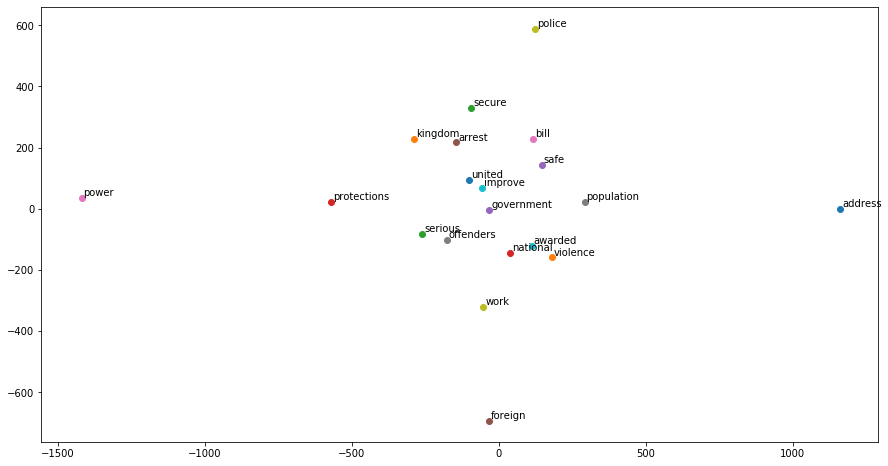

In [31]:
from sklearn.manifold import  TSNE
vocab = ['united','kingdom','secure','national','government','foreign','bill','offenders','work','improve','address','violence','serious','protections','safe','arrest','power','population','police','awarded']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)